In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
image_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

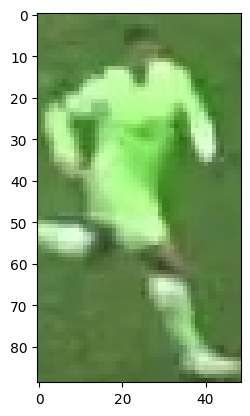

In [4]:
plt.imshow(image)
plt.show()

## Take the top half of the image

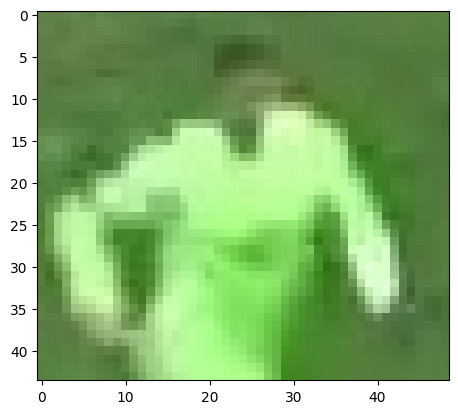

In [5]:
top_half_image=  image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

## Cluster the image into two clusters

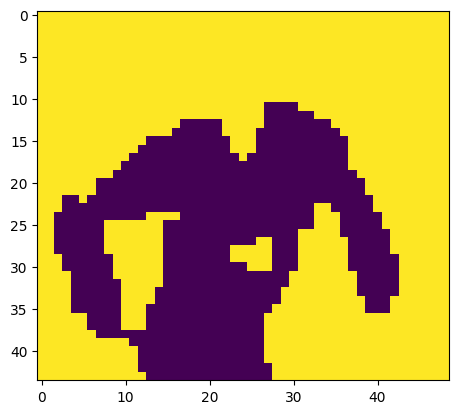

In [8]:
# K-Means clustering requires a 2D array, where each row represents a data point and each column represents a feature.
# Here, each pixel in the image is treated as a data point with 3 features (R, G, B values).
# Reshaping to (-1, 3) flattens the image into (H * W, 3), meaning:
    # Each row is a pixel [R, G, B].
    # Each column represents the intensity of Red, Green, or Blue.

# Reshape the image into 2d array
# top_half_image is a 3D Numpy array of shape (H, W, 3) 
image_2d = top_half_image.reshape(-1, 3)
# The -1 automatically calculates the correct number of rows based on available elements
# The 3 ensures that each row contains 3 values, corresponding to an RGB pixel.
# original shape : (H, W, 3) -> reshaped shape : (H*W, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0) # initializes the clustering algorithm with 2 clusters.
kmeans.fit(image_2d) # finds 2 dominant color groups in the image

# get the cluster labels
labels = kmeans.labels_  # After clustering, each pixel is assigned a cluster label (0 or 1).
# labels is a 1D array of size (H * W,) where each value represents the cluster assigned to the corresponding pixel.

# reshape the labels into the orginal image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1]) # The cluster labels are reshaped back into the original (H, W) shape
# Now, clustered_image is a 2D array, where:
    # Each pixel has either 0 or 1, indicating its cluster.
    # This forms a segmentation map of the image

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [9]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count) #  Identify the most frequent cluster label in the corners
print(non_player_cluster)

1


In [10]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [11]:
kmeans.cluster_centers_[player_cluster]

array([171.38378378, 235.65405405, 142.8472973 ])